# Name: 
# Ankit Dhandharia
# Aadit Harshal Baldha
# Riya Soni

## Batch: Fall 2024(2nd Sem)
## CWIDs: (Ankit's CWID)
## 20029691
## (Riya's CWID)

### Topic: ML Fundamentals and Applications Project Generalization Part

#### 4. Generalization

In [158]:
import pandas as pd
pd.set_option('display.max_columns',None)
dataset = pd.read_csv('test_data.csv')
dataset.columns = dataset.columns.str.strip()
dataset.head()

Index  ROA(C) before interest and depreciation before interest  \
0      0                                           0.414323         
1      1                                           0.497441         
2      2                                           0.501584         
3      3                                           0.574465         
4      4                                           0.393360         

   ROA(A) before interest and % after tax  \
0                                0.481029   
1                                0.560892   
2                                0.548899   
3                                0.637375   
4                                0.456444   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.468280                0.609514   
1                                           0.546603                0.610660   
2                                           0.556721                0.606134   
3                                           0.619680                0.600376   
4                                           0.440334                0.600009   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.609514               0.998889   
1                     0.610660               0.999108   
2                     0.606134               0.999034   
3                     0.600376               0.999030   
4                     0.600009               0.998800   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.797159                     0.809132   
1                   0.797545                     0.809431   
2                   0.797427                     0.809370   
3                   0.797528                     0.809426   
4                   0.797025                     0.809000   

   Non-industry income and expenditure/revenue  \
0                                     0.303290   
1                                     0.303506   
2                                     0.303453   
3                                     0.303640   
4                                     0.303240   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.781361            3.351150e-04   
1                              0.781691            1.344850e-04   
2                              0.781657            1.356420e-04   
3                              0.781691            4.760000e+09   
4                              0.781206            2.713990e-04   

   Research and development expense rate  Cash flow rate  \
0                           1.769160e-04        0.455909   
1                           0.000000e+00        0.476061   
2                           7.110000e+09        0.470906   
3                           4.750000e+08        0.469399   
4                           0.000000e+00        0.460686   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                         3.393339e-03      0.000000                 0.172138   
1                         2.440240e-04      0.206195                 0.158443   
2                         0.000000e+00      0.000000                 0.161519   
3                         2.600000e+08      0.148902                 0.208124   
4                         6.460650e-04      0.000000                 0.174287   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.172138                 0.172138   
1                 0.158443                 0.158443   
2                 0.161519                 0.161519   
3                 0.208124                 0.208124   
4                 0.174287                 0.174287   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.200908             0.316227   
1                                 0.225867             0.323937   
2                                 0.218588

In [159]:
dataset.shape

(1012, 96)

In [160]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Index                                                    1012 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  1012 non-null   float64
 2   ROA(A) before interest and % after tax                   1012 non-null   float64
 3   ROA(B) before interest and depreciation after tax        1012 non-null   float64
 4   Operating Gross Margin                                   1012 non-null   float64
 5   Realized Sales Gross Margin                              1012 non-null   float64
 6   Operating Profit Rate                                    1012 non-null   float64
 7   Pre-tax net Interest Rate                                1012 non-null   float64
 8   After-tax net Interest Rate 

In [161]:
dataset.describe()

Index  ROA(C) before interest and depreciation before interest  \
count  1012.000000                                        1012.000000         
mean    505.500000                                           0.503823         
std     292.283538                                           0.059989         
min       0.000000                                           0.082826         
25%     252.750000                                           0.475211         
50%     505.500000                                           0.501219         
75%     758.250000                                           0.535867         
max    1011.000000                                           0.691756         

       ROA(A) before interest and % after tax  \
count                             1012.000000   
mean                                 0.557087   
std                                  0.065458   
min                                  0.069287   
25%                                  0.534589   
50%                                  0.558929   
75%                                  0.588435   
max                                  0.777747   

       ROA(B) before interest and depreciation after tax  \
count                                        1012.000000   
mean                                            0.552079   
std                                             0.061499   
min                                             0.088388   
25%                                             0.526340   
50%                                             0.550806   
75%                                             0.585256   
max                                             0.761283   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             1012.000000                  1012.000000   
mean                 0.607894                     0.607879   
std                  0.013241                     0.013234   
min                  0.445646                     0.445646   
25%                  0.600441                     0.600448   
50%                  0.606239                     0.606192   
75%                  0.614298                     0.614211   
max                  0.664495                     0.664495   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            1012.000000                1012.000000   
mean                0.998924                   0.797177   
std                 0.001322                   0.005843   
min                 0.962961                   0.616328   
25%                 0.998972                   0.797384   
50%                 0.999025                   0.797462   
75%                 0.999095                   0.797576   
max                 0.999456                   0.803263   

       After-tax net Interest Rate  \
count                  1012.000000   
mean                      0.809099   
std                       0.005584   
min                       0.636191   
25%                       0.809310   
50%                       0.809371   
75%                       0.809471   
max                       0.814604   

       Non-industry income and expenditure/revenue  \
count                                  1012.000000   
mean                                      0.303248   
std                                       0.007663   
min                                       0.062507   
25%                                       0.303469   
50%                                       0.303528   
75%                                       0.303585   
max                                       0.313087   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                           1012.000000            1.012000e+03   
mean                               0.781450            1.984398e+09   
std                                0.002603            3.235224e+09   
min                                0.712333            1.000260e-04   
25%                                0.78156

In [162]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ----------------------
# STEP 1: Separate Target and Index
# ----------------------
indexes = dataset['Index']
dataset = dataset.drop(columns=['Index'])

# ----------------------
# STEP 2: Standardize Features
# ----------------------
scaler = StandardScaler()

# Fit scaler and transform features
standardized_array = scaler.fit_transform(dataset)

# Recreate the DataFrame
dataset = pd.DataFrame(standardized_array, columns=dataset.columns)

# ----------------------
# STEP 3: Verify
# ----------------------
print(dataset.describe())

       ROA(C) before interest and depreciation before interest  \
count                                       1.012000e+03         
mean                                        4.002069e-16         
std                                         1.000494e+00         
min                                        -7.021320e+00         
25%                                        -4.771830e-01         
50%                                        -4.342760e-02         
75%                                         5.344386e-01         
max                                         3.134329e+00         

       ROA(A) before interest and % after tax  \
count                            1.012000e+03   
mean                            -1.307694e-15   
std                              1.000494e+00   
min                             -7.455835e+00   
25%                             -3.438750e-01   
50%                              2.815826e-02   
75%                              4.791393e-01   
max          

In [163]:
columns_to_drop = [
'Research and development expense rate',
'Interest-bearing debt interest rate',
'Allocation rate per person',
'Net Value Per Share (B)',
'Net Value Per Share (A)',
'Net Value Per Share (C)',
'Per Share Net profit before tax (Yuan ¥)',
'Non-industry income and expenditure/revenue',
'Revenue per person',
'Operating profit per person',
'Net Income Flag',
'Cash Flow Per Share',
'Operating Expense Rate',
'Tax rate (A)',
'Revenue Per Share (Yuan ¥)',
'Fixed Assets Turnover Frequency',
'Inventory Turnover Rate (times)',
'Net Worth Turnover Rate (times)',
'Total Asset Turnover',
'Accounts Receivable Turnover',
'Average Collection Days',
'Current Asset Turnover Rate',
'Quick Asset Turnover Rate',
'Cash Turnover Rate',
'Total assets to GNP price',
'Inventory and accounts receivable/Net value',
'Inventory/Working Capital',
'Inventory/Current Liability',
]

dataset = dataset.drop(columns=columns_to_drop)
dataset.head()

ROA(C) before interest and depreciation before interest  \
0                                          -1.492667         
1                                          -0.106438         
2                                          -0.037330         
3                                           1.178161         
4                                          -1.842273         

   ROA(A) before interest and % after tax  \
0                               -1.162515   
1                                0.058154   
2                               -0.125154   
3                                1.227164   
4                               -1.538298   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                          -1.363282                0.122465   
1                                          -0.089091                0.209048   
2                                           0.075517               -0.132929   
3                                           1.099748               -0.568024   
4                                          -1.817915               -0.595796   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.123644              -0.026342   
1                     0.210275               0.139294   
2                    -0.131888               0.083499   
3                    -0.567220               0.080175   
4                    -0.595007              -0.093506   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                  -0.003039                     0.006043   
1                   0.063048                     0.059465   
2                   0.042772                     0.048617   
3                   0.060182                     0.058648   
4                  -0.026087                    -0.017751   

   Continuous interest rate (after tax)  Cash flow rate  \
0                             -0.034073       -0.747989   
1                              0.092723        0.627366   
2                              0.079665        0.275541   
3                              0.092777        0.172730   
4                             -0.093694       -0.421925   

   Persistent EPS in the Last Four Seasons  \
0                                -0.966422   
1                                -0.075282   
2                                -0.335198   
3                                 1.605732   
4                                -1.773174   

   Operating Profit Per Share (Yuan ¥)  \
0                            -0.832627   
1                             0.028286   
2                            -0.446700   
3                             0.915174   
4                            -1.374408   

   Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
0                                -0.100411                     -0.169811   
1                                -0.082404                     -0.032113   
2                                -0.053627                      0.314827   
3                                -0.059150                      0.043361   
4                                -0.091528                     -0.326114   

   After-tax Net Profit Growth Rate  Regular Net Profit Growth Rate  \
0                         -0.030519                       -0.033767   
1                          0.037659                        0.034587   
2                          3.328618                        3.334008   
3                          0.062681                        0.059674   
4                         -0.549470                       -0.284761   

   Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
0                          -0.066499                -0.304337   
1                           0.026917                -0.671458   
2                           0.659720                 0.465205   
3                           0.057719                 0.934696   
4                          -0.378118                -0.113717   

   Net V

In [164]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def get_corr_pairs(df, threshold_low=0.85, threshold_high=0.95):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    drop_pairs = []
    pca_pairs = []

    for row in upper_tri.index:
        for col in upper_tri.columns:
            corr = upper_tri.loc[row, col]
            if pd.notna(corr):
                if corr > threshold_high:
                    drop_pairs.append((row, col, corr))
                elif corr > threshold_low:
                    pca_pairs.append((row, col, corr))

    drop_df = pd.DataFrame(drop_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    pca_df = pd.DataFrame(pca_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    return drop_df.sort_values(by='Correlation', ascending=False), pca_df.sort_values(by='Correlation', ascending=False)

def filter_unique_pairs(df_corr):
    used = set()
    final = []
    for _, row in df_corr.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in used and f2 not in used:
            final.append(row)
            used.update([f1, f2])
    return pd.DataFrame(final)

def apply_pca(df, pairs_df):
    df_out = df.copy()
    new_cols = []

    for _, row in pairs_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in df_out.columns or f2 not in df_out.columns:
            continue

        data = df_out[[f1, f2]].dropna().values
        if data.shape[0] == 0:
            continue

        data -= data.mean(axis=0)
        pca = PCA(n_components=1)
        pc1 = pca.fit_transform(data).flatten()

        new_col = f"PCA_{f1}_{f2}"
        df_out[new_col] = np.nan
        df_out.loc[df_out[[f1, f2]].dropna().index, new_col] = pc1
        df_out.drop(columns=[f1, f2], inplace=True)
        new_cols.append(new_col)

    return df_out, new_cols


def apply_drops(df, drop_df):
    df_out = df.copy()
    to_drop = set()
    for _, row in drop_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in to_drop and f2 not in to_drop:
            to_drop.add(f2)  # drop second feature by default
    df_out.drop(columns=list(to_drop), inplace=True, errors='ignore')
    return df_out

def hybrid_iterative_reduction(df, thresh_low=0.8, thresh_high=0.98, verbose=False):
    df_iter = df.copy()
    iteration = 1
    all_pca_cols = []

    while True:
        drop_df, pca_df = get_corr_pairs(df_iter, threshold_low=thresh_low, threshold_high=thresh_high)

        if drop_df.empty and pca_df.empty:
            if verbose:
                print("No more correlated features to process.")
            break

        if verbose:
            print(f"\n--- Iteration {iteration} ---")
            if not drop_df.empty:
                print("Drop Pairs:")
                print(drop_df)
            if not pca_df.empty:
                print("PCA Pairs:")
                print(pca_df)

        if not drop_df.empty:
            df_iter = apply_drops(df_iter, drop_df)

        if not pca_df.empty:
            unique_pca_df = filter_unique_pairs(pca_df)
            df_iter, new_pca_cols = apply_pca(df_iter, unique_pca_df)
            all_pca_cols.extend(new_pca_cols)

        iteration += 1

    return df_iter.reset_index(drop=True), all_pca_cols

final_df, pca_features = hybrid_iterative_reduction(dataset, thresh_low=0.8, thresh_high=0.95, verbose=True)
final_df.head(1)


--- Iteration 1 ---
Drop Pairs:
                                            Feature_1  \
12                      Current Liabilities/Liability   
13                         Current Liabilities/Equity   
10                                       Debt ratio %   
3                              Operating Gross Margin   
6                           Pre-tax net Interest Rate   
4                         Realized Sales Gross Margin   
2                              Operating Gross Margin   
9                    After-tax Net Profit Growth Rate   
8                 Operating Profit Per Share (Yuan ¥)   
0   ROA(C) before interest and depreciation before...   
11                               Borrowing dependency   
7             Persistent EPS in the Last Four Seasons   
5                               Operating Profit Rate   
1              ROA(A) before interest and % after tax   

                                            Feature_2  Correlation  
12                     Current Liability t

Operating Gross Margin  Realized Sales Gross Profit Growth Rate  \
0                0.122465                                -0.100411   

   Operating Profit Growth Rate  Continuous Net Profit Growth Rate  \
0                     -0.169811                          -0.066499   

   Total Asset Growth Rate  Net Value Growth Rate  \
0                -0.304337              -0.415182   

   Total Asset Return Growth Rate Ratio  Cash Reinvestment %  Quick Ratio  \
0                             -1.548293            -0.260663    -0.043472   

   Interest Expense Ratio  Total debt/Total net worth  \
0               -0.009416                    -0.03145   

   Long-term fund suitability ratio (A)  Contingent liabilities/Net worth  \
0                             -0.092652                          -0.24753   

   Working Capital to Total Assets  Quick Assets/Total Assets  \
0                         1.989955                   0.220761   

   Current Assets/Total Assets  Cash/Total Assets  \
0                      0.95161          -0.097155   

   Quick Assets/Current Liability  Cash/Current Liability  \
0                        -0.03145               -0.071626   

   Current Liabilities/Liability  Working Capital/Equity  \
0                       0.502303                0.385991   

   Long-term Liability to Current Assets  Retained Earnings to Total Assets  \
0                              -0.108577                          -0.147597   

   Total income/Total expense  Total expense/Assets  Fixed Assets to Assets  \
0                   -0.667558              0.912897               -0.267227   

   Cash Flow to Liability  CFO to Assets  Current Liability to Current Assets  \
0                0.177776      -0.683225                            -1.031779   

   Liability-Assets Flag  No-credit Interval  \
0               -0.03145            0.032686   

   Net Income to Stockholder's Equity  Degree of Financial Leverage (DFL)  \
0                           -0.289654                           -0.043536   

   Interest Coverage Ratio (Interest expense to EBIT)  \
0                                          -0.047022    

   PCA_Cash flow rate_Operating Funds to Liability  \
0                                        -1.123101   

   PCA_Current Ratio_Equity to Liability  \
0                               1.956195   

   PCA_Persistent EPS in the Last Four Seasons_Operating Profit Per Share (Yuan ¥)  \
0                                           -1.27212                                 

   PCA_Cash Flow to Total Assets_Cash Flow to Equity  \
0                                           0.077608   

   PCA_Working capitcal Turnover Rate_Cash Flow to Sales  \
0                                           0.003256       

   PCA_Net Income to Total Assets_PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax  \
0                                          -2.088483                                                                                   

   PCA_Current Liabilities/Equity_PCA_Borrowing dependency_Equity to Long-term Liability  \
0                                          -0.512337                                       

   PCA_Debt ratio %_Current Liability to Assets  \
0                                     -2.113394   

   PCA_After-tax Net Profit Growth Rate_PCA_Operating Profit Rate_Pre-tax net Interest Rate  
0                                          -0.034258

In [165]:
final_df.shape

(1012, 43)

In [166]:
final_df.columns

Index(['Operating Gross Margin', 'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'Continuous Net Profit Growth Rate',
       'Total Asset Growth Rate', 'Net Value Growth Rate',
       'Total Asset Return Growth Rate Ratio', 'Cash Reinvestment %',
       'Quick Ratio', 'Interest Expense Ratio', 'Total debt/Total net worth',
       'Long-term fund suitability ratio (A)',
       'Contingent liabilities/Net worth', 'Working Capital to Total Assets',
       'Quick Assets/Total Assets', 'Current Assets/Total Assets',
       'Cash/Total Assets', 'Quick Assets/Current Liability',
       'Cash/Current Liability', 'Current Liabilities/Liability',
       'Working Capital/Equity', 'Long-term Liability to Current Assets',
       'Retained Earnings to Total Assets', 'Total income/Total expense',
       'Total expense/Assets', 'Fixed Assets to Assets',
       'Cash Flow to Liability', 'CFO to Assets',
       'Current Liability to Current Assets', 'Liability-Assets Fl

In [167]:
final_df.describe()

Operating Gross Margin  Realized Sales Gross Profit Growth Rate  \
count            1.012000e+03                             1.012000e+03   
mean             3.995048e-15                            -6.178632e-16   
std              1.000494e+00                             1.000494e+00   
min             -1.225950e+01                            -6.697187e+00   
25%             -5.631227e-01                            -8.676158e-02   
50%             -1.250327e-01                            -7.239546e-02   
75%              4.839095e-01                            -5.616825e-02   
max              4.276832e+00                             2.183852e+01   

       Operating Profit Growth Rate  Continuous Net Profit Growth Rate  \
count                  1.012000e+03                       1.012000e+03   
mean                   5.947636e-14                       4.209193e-15   
std                    1.000494e+00                       1.000494e+00   
min                   -2.684136e+01                      -2.793566e+01   
25%                   -6.681941e-02                       1.190320e-02   
50%                   -7.056991e-03                       4.133439e-02   
75%                    6.176363e-02                       7.362143e-02   
max                    8.721808e+00                       2.690934e+00   

       Total Asset Growth Rate  Net Value Growth Rate  \
count             1.012000e+03           1.012000e+03   
mean             -1.930823e-16           7.723291e-17   
std               1.000494e+00           1.000494e+00   
min              -1.966972e+00          -2.082592e+00   
25%              -2.107922e-01          -2.940198e-01   
50%               2.922342e-01          -1.777708e-01   
75%               6.417052e-01           3.505762e-02   
max               1.555978e+00           1.765097e+01   

       Total Asset Return Growth Rate Ratio  Cash Reinvestment %  Quick Ratio  \
count                          1.012000e+03         1.012000e+03  1012.000000   
mean                          -1.903265e-14        -2.527622e-16     0.000000   
std                            1.000494e+00         1.000494e+00     1.000494   
min                           -5.227201e+00        -5.418565e+00    -0.043472   
25%                           -3.747483e-01        -2.175594e-01    -0.043472   
50%                           -9.879100e-02         1.218032e-02    -0.043472   
75%                            2.346484e-01         2.452084e-01    -0.043472   
max                            1.138925e+01         2.365786e+01    26.759432   

       Interest Expense Ratio  Total debt/Total net worth  \
count            1.012000e+03                1.012000e+03   
mean            -1.140941e-15               -3.510587e-18   
std              1.000494e+00                1.000494e+00   
min             -2.696650e+01               -3.145027e-02   
25%             -2.226102e-03               -3.145027e-02   
50%              1.456677e-03               -3.145027e-02   
75%              1.941662e-02               -3.145027e-02   
max              1.579238e+01                3.179623e+01   

       Long-term fund suitability ratio (A)  Contingent liabilities/Net worth  \
count                          1.012000e+03                      1.012000e+03   
mean                          -1.228705e-17                     -8.951996e-16   
std                            1.000494e+00                      1.000494e+00   
min                           -1.372550e-01                     -2.475299e-01   
25%                           -1.119818e-01                     -2.475299e-01   
50%                           -1.019303e-01                     -2.475299e-01   
75%                           -7.530686e-02                     -6.961217e-02   
max                            2.329590e+01                      2.411036e+01   

       Working Capital to Total Assets  Quick Assets/Total Assets  \
count                     1.012000e+03               1.012000e+03   
mean       

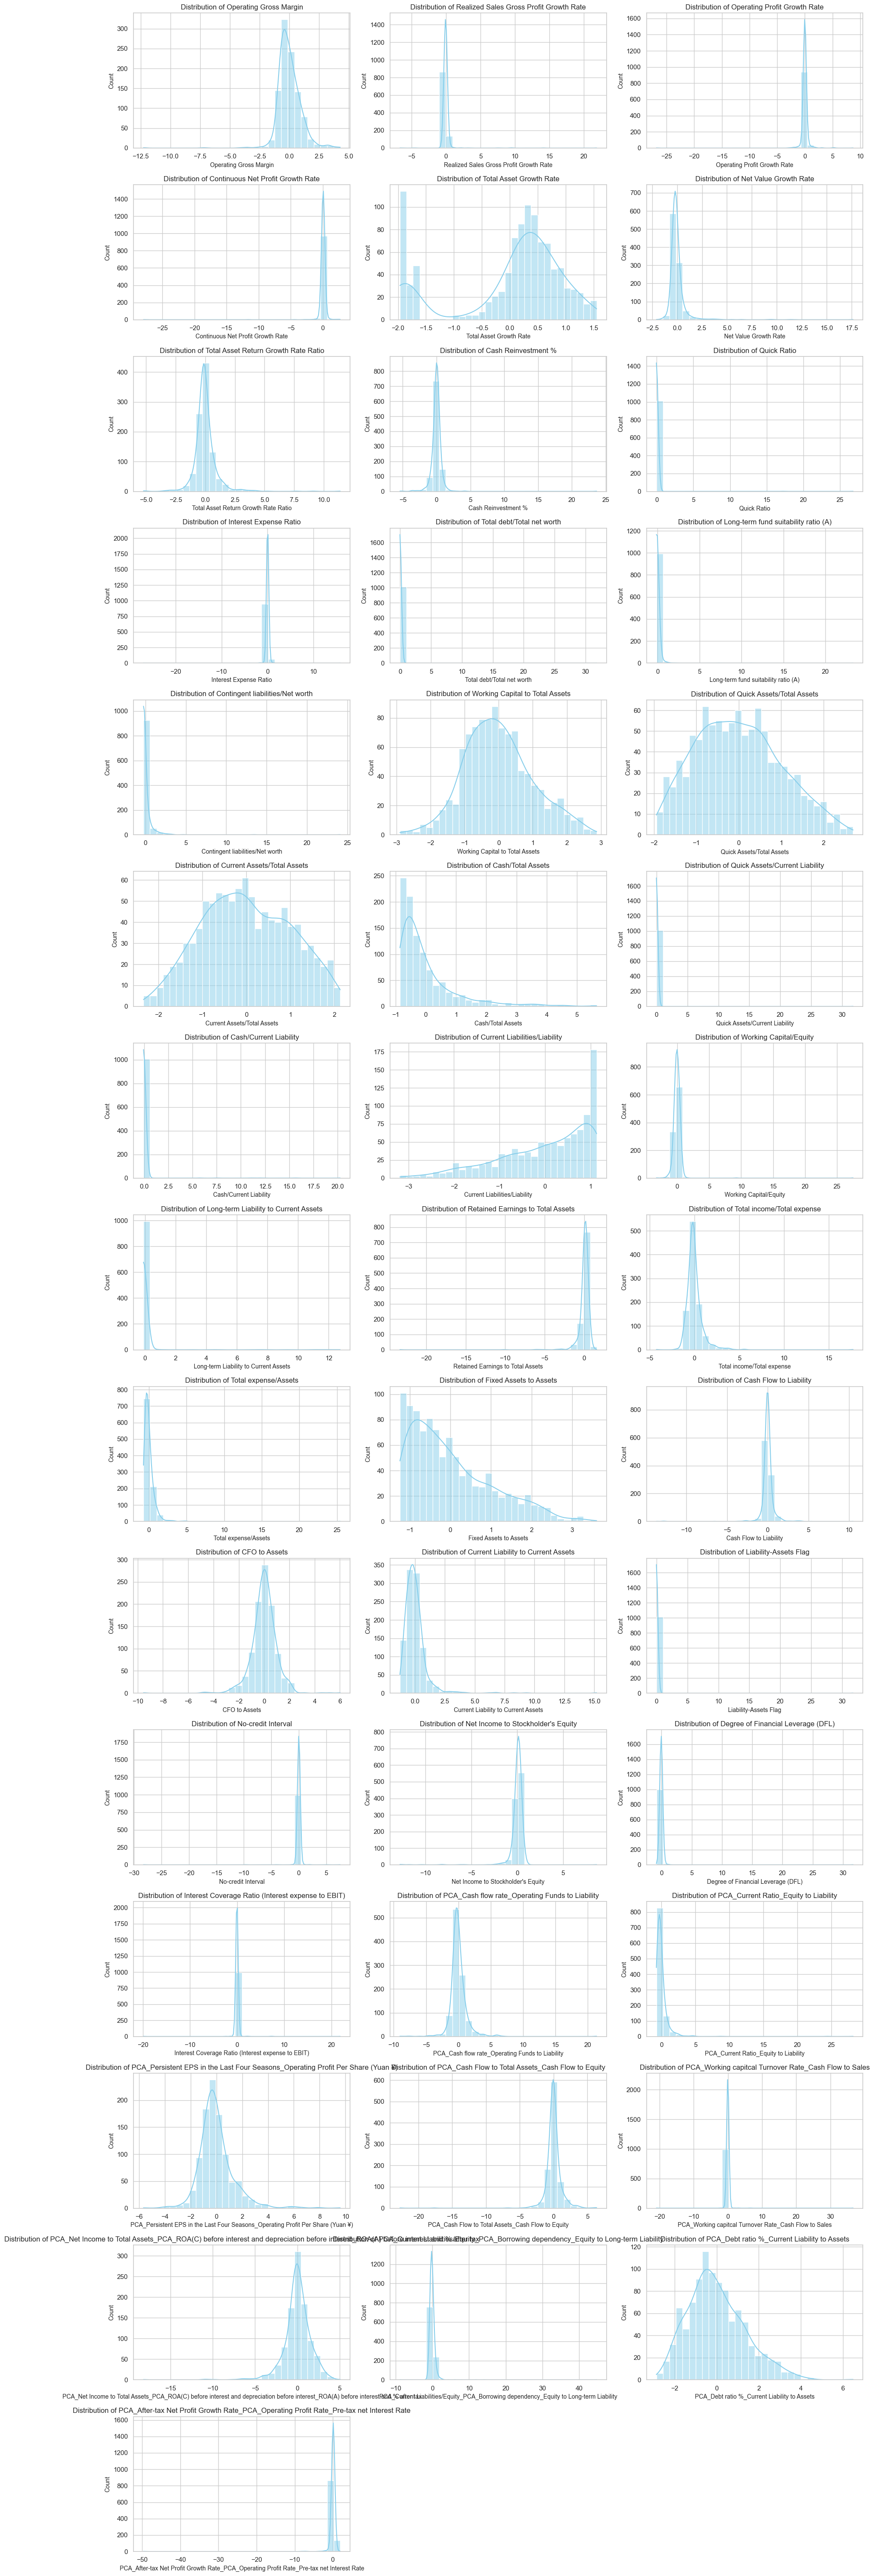

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df is already defined
numerical_features = final_df.select_dtypes(include=['int64', 'float64']).columns

# Set a cohesive visual style
sns.set(style="whitegrid")

# Define the subplot grid size dynamically
n_features = len(numerical_features)
n_cols = 3  # Number of columns
n_rows = (n_features + n_cols - 1) // n_cols  # Compute rows needed

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

# Create subplots for each feature
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(final_df[feature].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


Distribution Comparison: 100%|██████████| 43/43 [00:04<00:00,  9.92it/s]


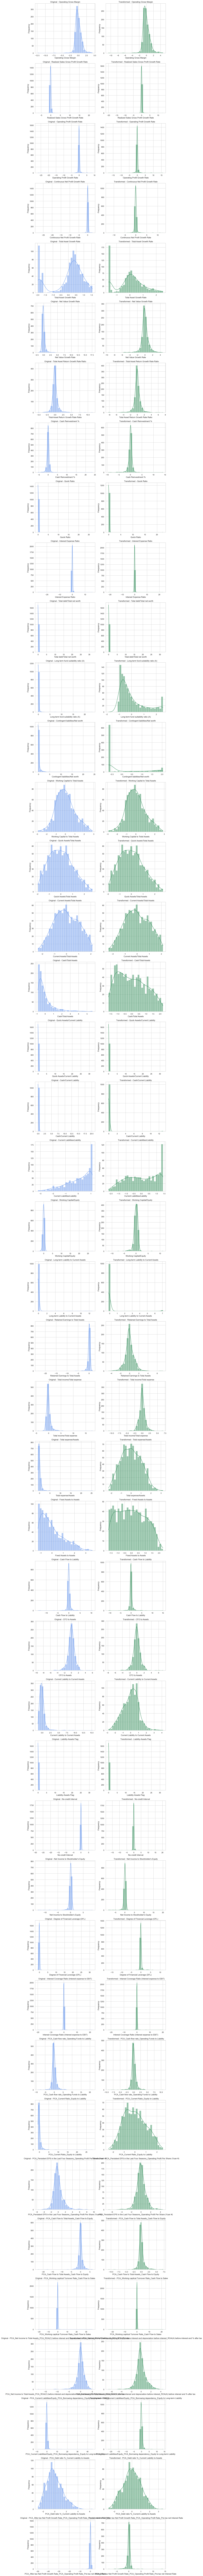


Sample of Transformed Data:
   Operating Gross Margin  Realized Sales Gross Profit Growth Rate  \
0                0.097603                                -0.085584   
1                0.185997                                -0.056167   
2               -0.159634                                -0.009622   
3               -0.587095                                -0.018510   
4               -0.614002                                -0.071045   

   Operating Profit Growth Rate  Continuous Net Profit Growth Rate  \
0                     -0.245257                          -0.292628   
1                     -0.080890                          -0.067980   
2                      0.357923                           1.869367   
3                      0.011575                           0.009644   
4                     -0.425908                          -0.946183   

   Total Asset Growth Rate  Net Value Growth Rate  \
0                -0.605790              -0.713336   
1                -0.897

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from scipy.stats import skew
from tqdm import tqdm
import os

def plot_side_by_side_distributions(original_df, transformed_df, title_prefix="Distribution", save=False, folder_path="./plots"):
    os.makedirs(folder_path, exist_ok=True)
    num_cols = len(original_df.columns)
    
    # Create a subplot with 2 columns
    fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
    
    for idx, col in enumerate(tqdm(original_df.columns, desc=title_prefix)):
        # Plot the original distribution
        sns.histplot(original_df[col].dropna(), kde=True, bins=30, color="cornflowerblue", ax=axes[idx, 0])
        axes[idx, 0].set_title(f"Original - {col}")
        axes[idx, 0].set_xlabel(col)
        axes[idx, 0].set_ylabel("Frequency")
        
        # Plot the transformed distribution
        sns.histplot(transformed_df[col].dropna(), kde=True, bins=30, color="seagreen", ax=axes[idx, 1])
        axes[idx, 1].set_title(f"Transformed - {col}")
        axes[idx, 1].set_xlabel(col)
        axes[idx, 1].set_ylabel("Frequency")
    
    plt.tight_layout()
    
    if save:
        plt.savefig(f"{folder_path}/{title_prefix.replace(' ', '_')}_side_by_side.png")
        plt.close()
    else:
        plt.show()

# --------------------------
# Adaptive Transformation Function
# --------------------------

def adaptive_transform(df):
    transformed_data = {}
    transformers = {}

    for feature in tqdm(df.columns, desc="Adaptive Transforming"):
        x = df[feature].values.reshape(-1, 1)
        feature_skew = skew(x.flatten(), nan_policy='omit')
        min_val = np.nanmin(x)

        # Default: no transform
        transformer = FunctionTransformer(func=None, validate=True)
        transformed = x

        # Skip features with ~Gaussian distribution
        if abs(feature_skew) <= 0.5:
            transformers[feature] = transformer
            transformed_data[feature] = transformed.flatten()
            continue

        try:
            # Positive-only feature: use Box-Cox
            if min_val > 0:
                transformer = PowerTransformer(method='box-cox', standardize=True)
                transformed = transformer.fit_transform(x)

            # Non-positive values: use Yeo-Johnson
            elif min_val <= 0:
                transformer = PowerTransformer(method='yeo-johnson', standardize=True)
                transformed = transformer.fit_transform(x)

            transformers[feature] = transformer
            transformed_data[feature] = transformed.flatten()
        except Exception as e:
            # If transformation fails, keep original
            print(f"Warning: Failed to transform {feature} - {e}")
            transformed_data[feature] = x.flatten()
            transformers[feature] = FunctionTransformer(func=None)

    return pd.DataFrame(transformed_data), transformers

# --------------------------
# EXECUTION
# --------------------------

# Assume `final_df` is already loaded
# final_df = pd.read_csv(...) or simulated

# Apply the transformation
transformed_df, applied_transformers = adaptive_transform(final_df)

# Original and Transformed Distributions Side by Side
plot_side_by_side_distributions(final_df, transformed_df, title_prefix="Distribution Comparison", save=False)

# Output
print("\nSample of Transformed Data:")
print(transformed_df.head())


##### Running the Classification Model

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       311
           1       0.95      0.96      0.95       470
           2       0.96      0.95      0.96       381

    accuracy                           0.95      1162
   macro avg       0.96      0.95      0.95      1162
weighted avg       0.95      0.95      0.95      1162



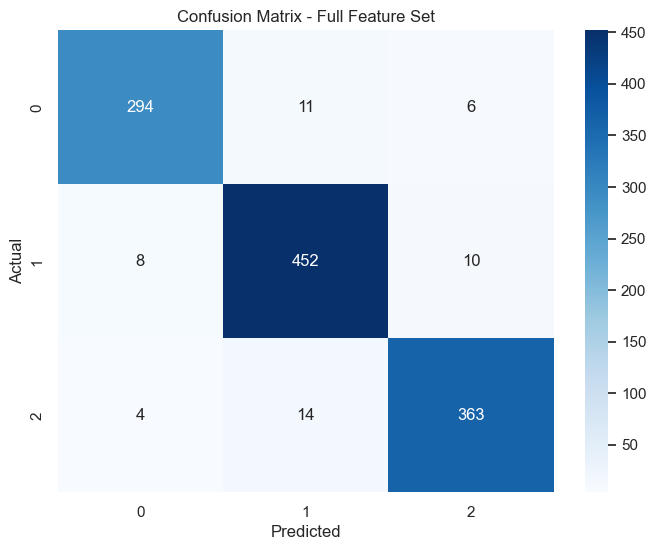


Top 28 feature dataset saved to output/top_28_features_test.csv


In [170]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

clustered_df = pd.read_csv('output/clustered_data.csv')
X_full = clustered_df.drop(columns=['Cluster'])
y = clustered_df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, stratify=y, random_state=42
)

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Full Feature Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

feature_importances = pd.Series(
    grid_search.best_estimator_.feature_importances_,
    index=X_full.columns
).sort_values(ascending=False)
feature_importances.to_csv("output/feature_importances_full_test.csv")

top_n = 28  
top_features = feature_importances.head(top_n).index.tolist()

top_n_df = clustered_df[top_features + ['Cluster']]
top_n_df.to_csv(f"output/top_{top_n}_features_test.csv", index=False)
print(f"\nTop {top_n} feature dataset saved to output/top_{top_n}_features_test.csv")


<Figure size 1200x800 with 0 Axes>

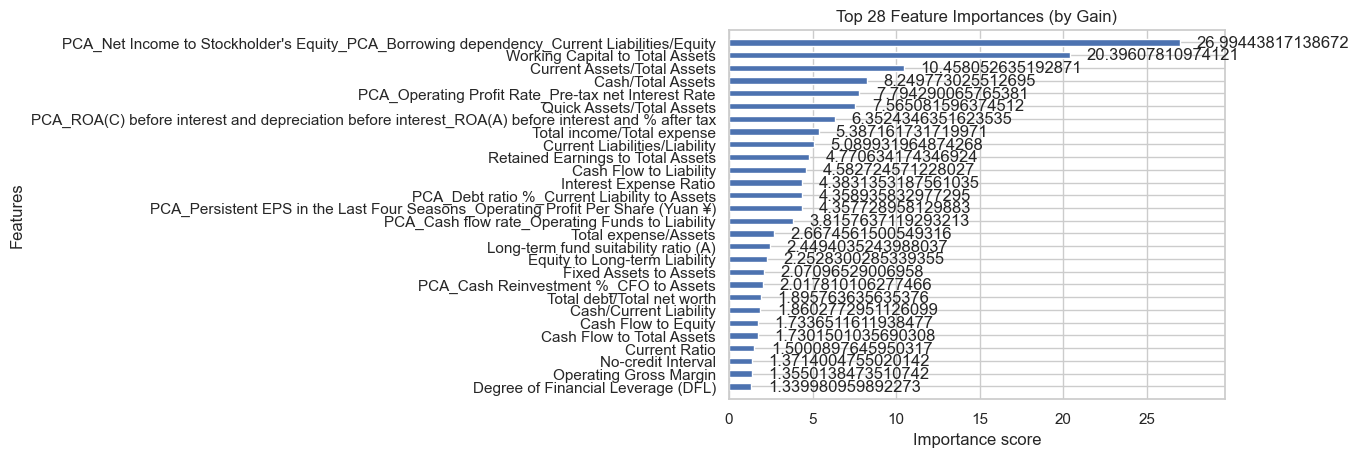

In [171]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Access the trained model
best_model = grid_search.best_estimator_

# Plot top N feature importances by gain
plt.figure(figsize=(12, 8))
xgb.plot_importance(
    best_model,
    importance_type='gain',  # or 'weight', 'cover', 'total_gain'
    max_num_features=top_n,
    height=0.5
)
plt.title(f'Top {top_n} Feature Importances (by Gain)')
plt.show()


In [172]:
import pandas as pd
import joblib
import os

# Load trained classification model
classification_model = joblib.load('output/xgb_top_28_features_model.joblib')

# Predict clusters
reduced_test_df = pd.read_csv(f'output/top_{top_n}_features_test.csv')
print('Shape of reduced test set:',reduced_test_df.shape)
predicted_clusters = classification_model.predict(reduced_test_df.drop(columns=['Cluster','PCA_Net Income to Stockholder\'s Equity_PCA_Borrowing dependency_Current Liabilities/Equity']))

reduced_test_df['Predicted_Cluster'] = predicted_clusters
reduced_test_df['Index'] = indexes
for cluster_label, group in reduced_test_df.groupby('Predicted_Cluster'):
    path = f"output/cluster_test_datasets/predicted_test_cluster_{int(cluster_label)}.csv"
    group.drop(columns=['Cluster', 'Predicted_Cluster']).to_csv(path, index=False)
    print(f"Saved predicted cluster {int(cluster_label)} to {path}")


Shape of reduced test set: (5807, 29)
Saved predicted cluster 0 to output/cluster_test_datasets/predicted_test_cluster_0.csv
Saved predicted cluster 1 to output/cluster_test_datasets/predicted_test_cluster_1.csv
Saved predicted cluster 2 to output/cluster_test_datasets/predicted_test_cluster_2.csv


##### Predictions for the test cluster #0 with saved stacking model

In [173]:
subgroup_0_model = joblib.load('output/stacking_model_reduced_features.joblib')

In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [175]:
# Separate features and labels
predicted_cluster_df=pd.read_csv('output/cluster_test_datasets/predicted_test_cluster_0.csv')
X = predicted_cluster_df.drop(columns=['Index'])
index_for_report = predicted_cluster_df['Index']

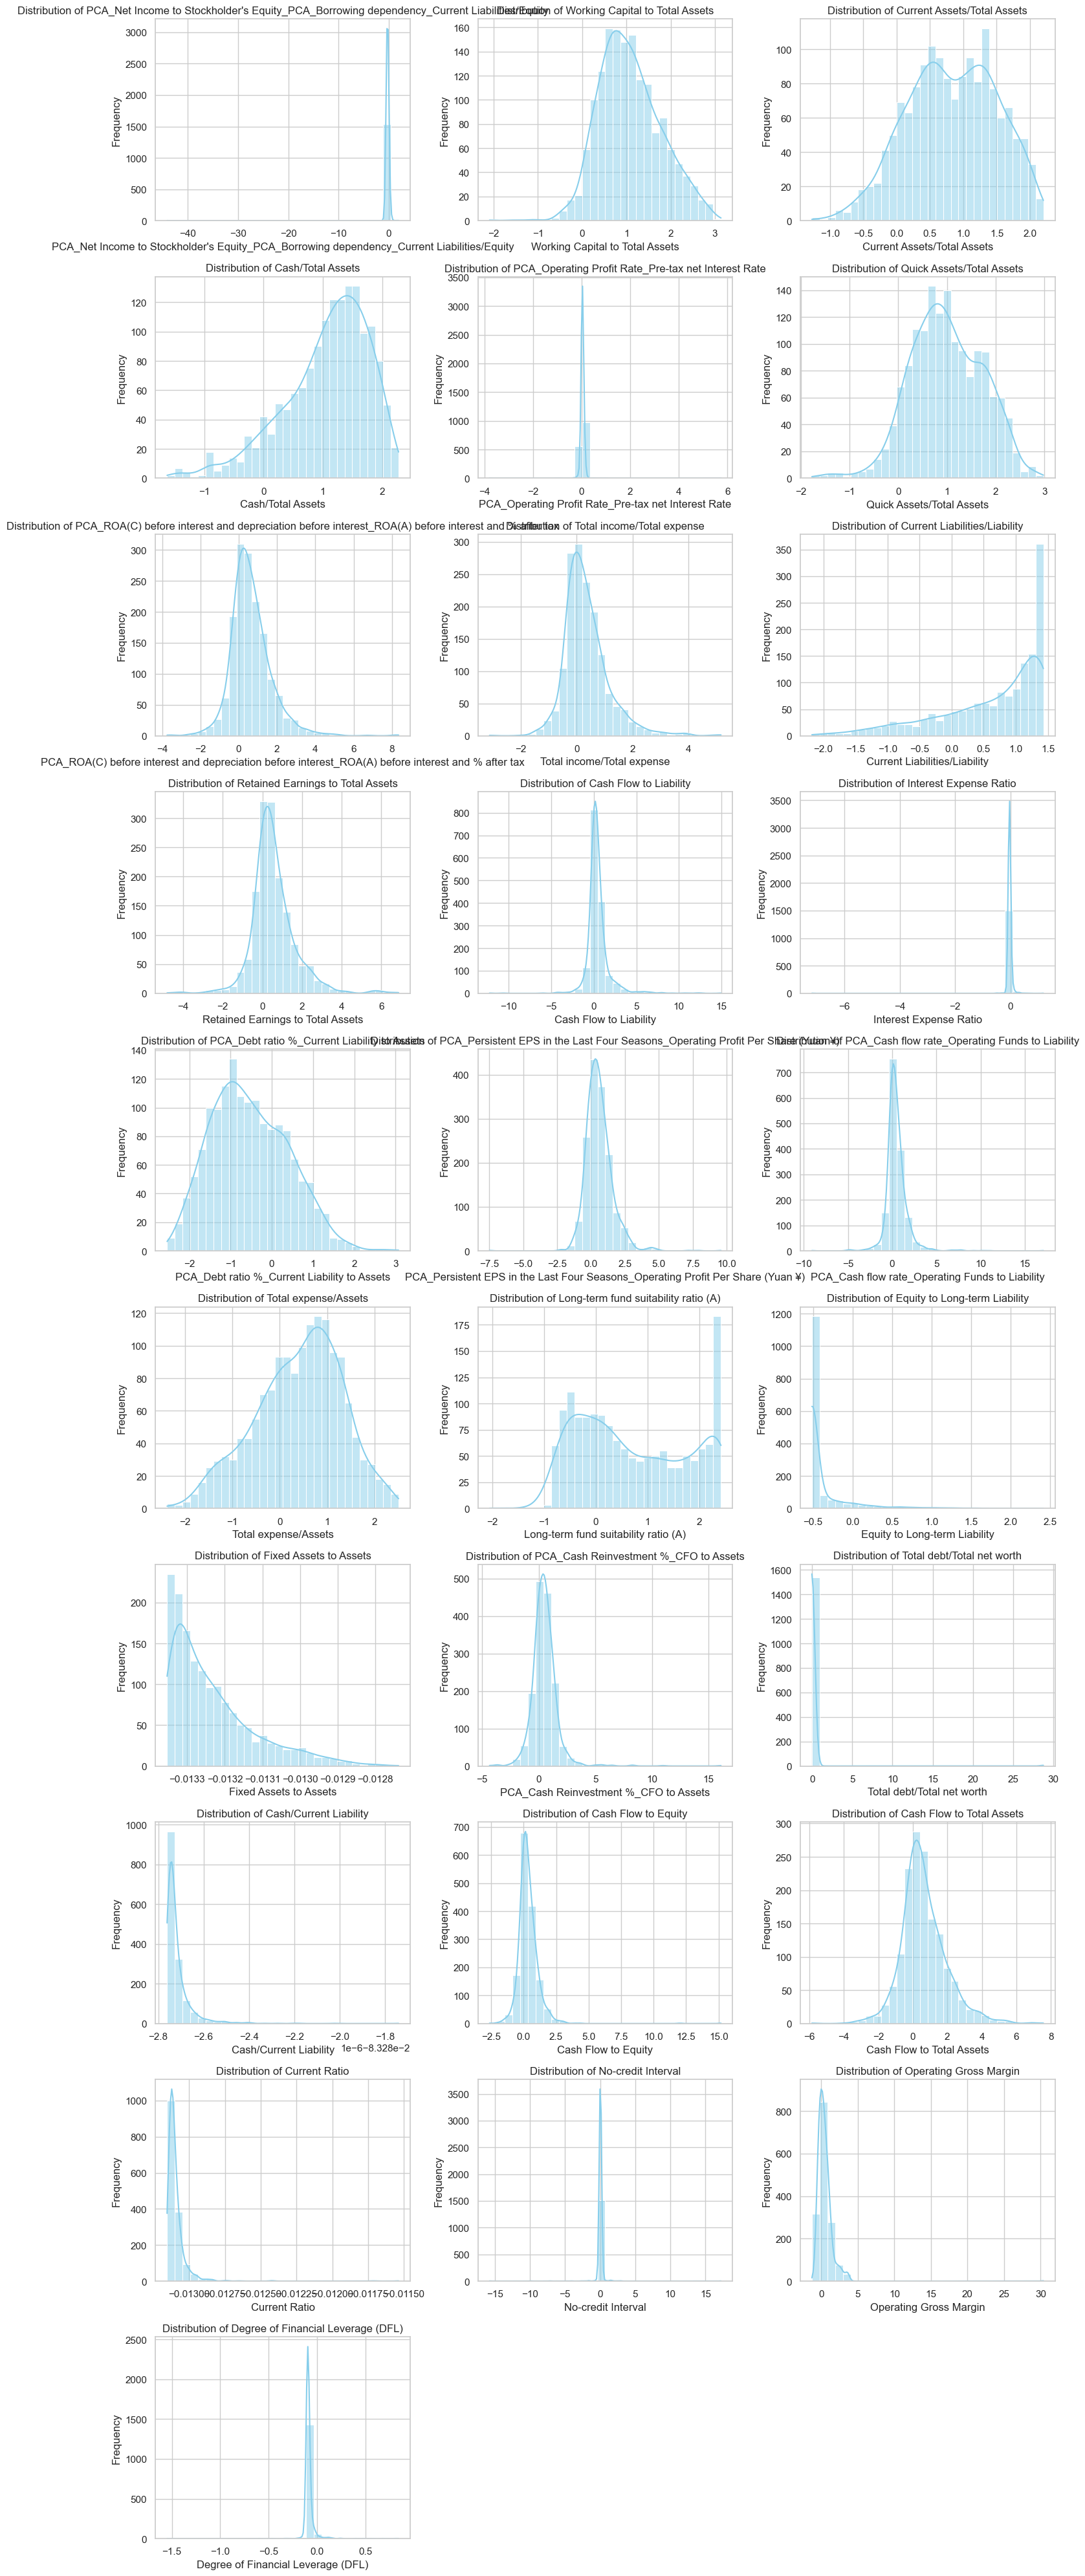

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style='whitegrid')

# Create subplots
num_features = X.shape[1]
cols = 3  # Number of columns in the subplot grid
rows = (num_features + cols - 1) // cols  # Calculate required rows

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(X.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(X[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [177]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# === Load data and augment ===
columns_to_drop=[
'Interest Expense Ratio',
'Long-term fund suitability ratio (A)',
'Total debt/Total net worth',
'No-credit Interval',
'Degree of Financial Leverage (DFL)',
]
df = pd.read_csv("output/cluster_test_datasets/predicted_test_cluster_0.csv").drop(columns=columns_to_drop)

In [178]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    classification_report, confusion_matrix, recall_score, average_precision_score,
    precision_recall_curve
)

# === Assume df is preloaded with 'Bankrupt?' as the target ===
X_orig = df.drop(columns=['Index'])
custom_threshold = 0.005

top_10_features = joblib.load('top_10_features.pkl')
# === Reduce dataset to selected features ===
X_reduced = X_orig[top_10_features]

risk_scores_stack = subgroup_0_model.predict_proba(X_reduced)[:, 1]
y_pred_stack = (risk_scores_stack >= custom_threshold).astype(int)

print(y_pred_stack)

[0 0 0 ... 0 0 0]
